# **Remote-controlled randomness**

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
import math
%matplotlib inline

In [3]:
# Set up the program
a = QuantumRegister(1, name='a')
b = QuantumRegister(1, name='b')
a_c = ClassicalRegister(1, name='ac')
b_c = ClassicalRegister(1, name='bc')
qc = QuantumCircuit(a, b, a_c, b_c)

In [4]:
qc.h(a)
## now prob of a is 50%
qc.h(b)
qc.t(b)
qc.h(b)
## now prob of b is 15%
qc.cx(a, b)        # entangle a and b
## Now, you can read *either*
## qubit and get 50% prob.
## If the result is 0, then
## the prob of the *remaining*
## qubit is 15%, else it's 85%
qc.barrier()
qc.measure(a, a_c)
qc.barrier()
qc.measure(b, b_c)

In [5]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

In [6]:
counts = result.get_counts(qc)
print('counts:',counts)

counts: {'0 1': 1}


[0.   +0.j    0.383-0.924j 0.   +0.j    0.   +0.j   ]


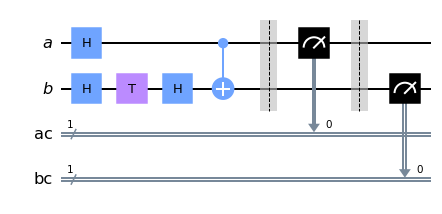

In [7]:
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit